# Red Wine Quality Prediction

Problem Statement:
    
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('wine_quality_red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Attribute Information:
    
    Input variables (based on physicochemical tests):
    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    
Output variable (based on sensory data):

    12 - quality (score between 0 and 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are total 1599 rows and 12 columns.

All the columns are of numerical type.

There are no null values in the dataset.

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observation:
    
1. The mean is more than median (50th percentile) in all columns.

2. There is a large difference in 75% percentile and max in residual sugar, free sulphur dioxide, total sulfur dioxide.

3. The 1 and 2 observation suggest that there are extreme outliers present in these three columns.

In [8]:
#Check the quality score in the data
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

The quality score is ordinal and categorical type.

As per the description the score ranges from 0 10 10, where 0 or 1 is lowest and 10 is the highest.

Scores present in our dataset is from 3 to 8.

In [9]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

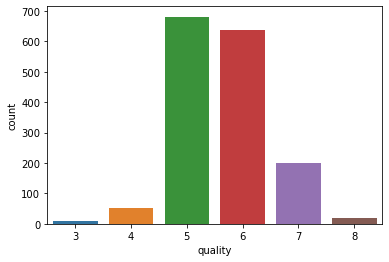

In [11]:
sns.countplot(df['quality'])

Quality score has most of the values concentrated in categories of 5, 6 and 7.

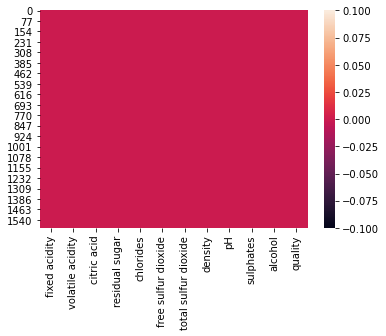

In [12]:
#checking missing values
sns.heatmap(df.isnull())

There are no null values in the data.

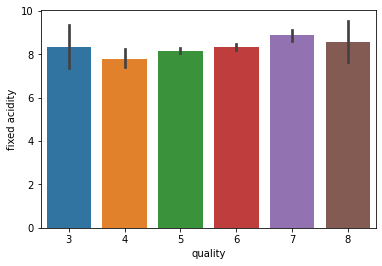

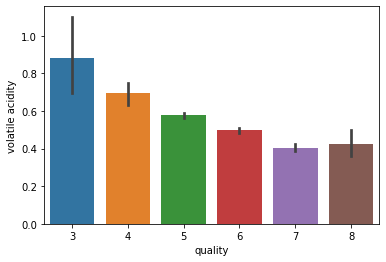

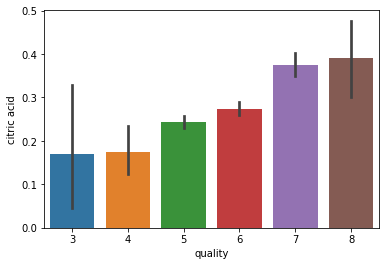

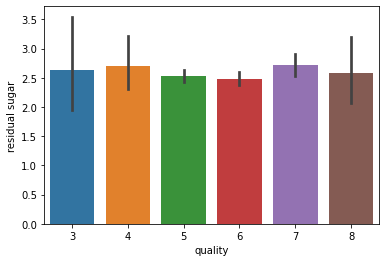

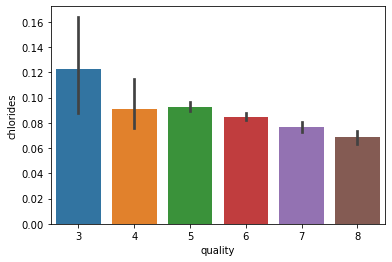

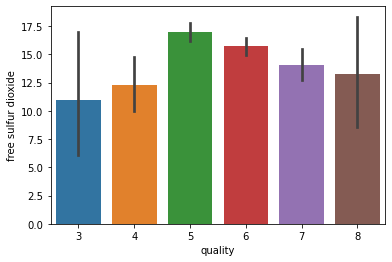

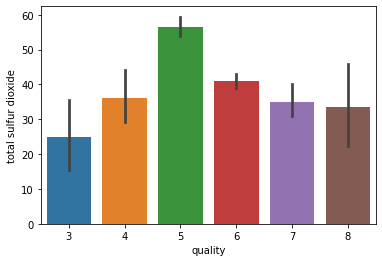

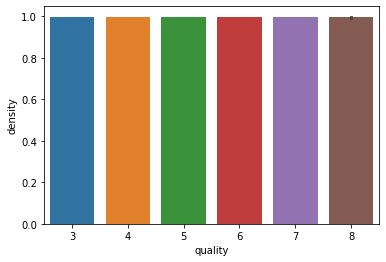

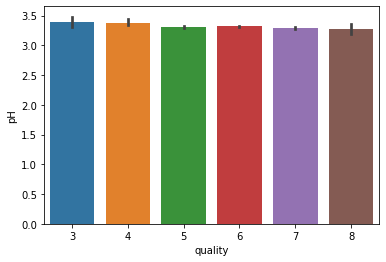

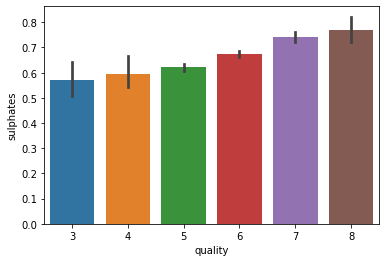

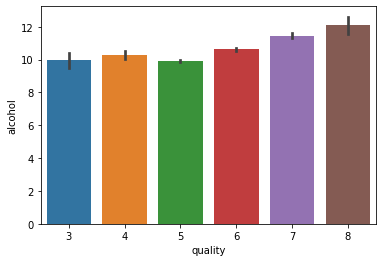

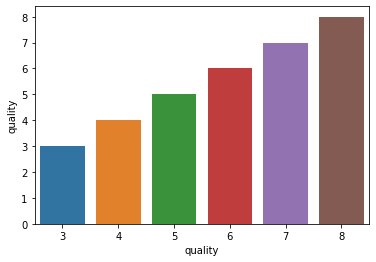

In [23]:
for i in df.columns:
    sns.barplot(x='quality',y=i,data=df)
    plt.show()

In [24]:
#Fixed acidity doesn't provide much information to classify the quality of wine.
#We can see a decrease in volatile acidity with increase in quality.
#There is an increase in quality with increase in citrid acid.
#No much information form residual sugar.
#Quality incrases with decrease in chloride.
#free sulphur dioxide don't give enough information.
#density and ph both doesn't provide enough information.
#Sulphates level increases with quality of wine.
#Alcohol level also increases with increase in qulaity of wine.

Checking correlation

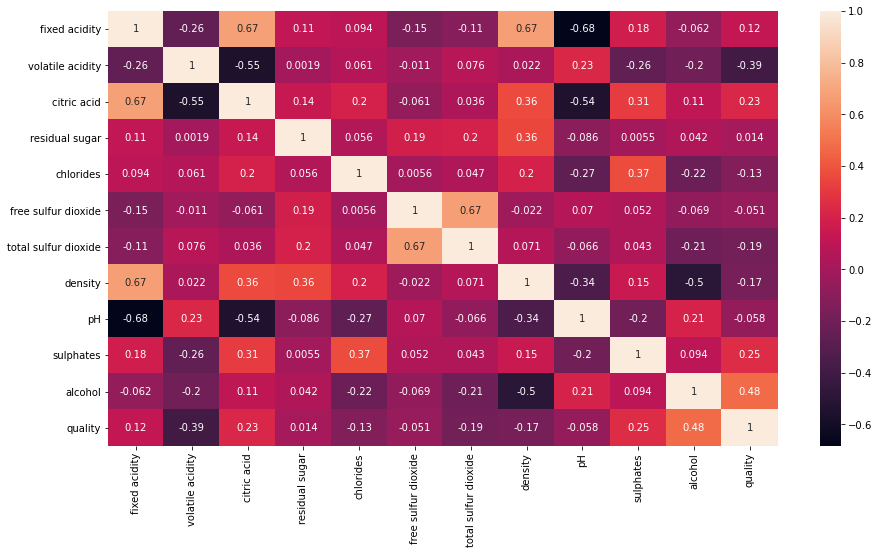

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Obsevation:
    
Quality is highly(+ve) correlated with alcohol level.

volatile acidity is negatively correlated with quality.

free sulphuric acid is highly correlated with total sulphur dioxode.

# Checking outliers

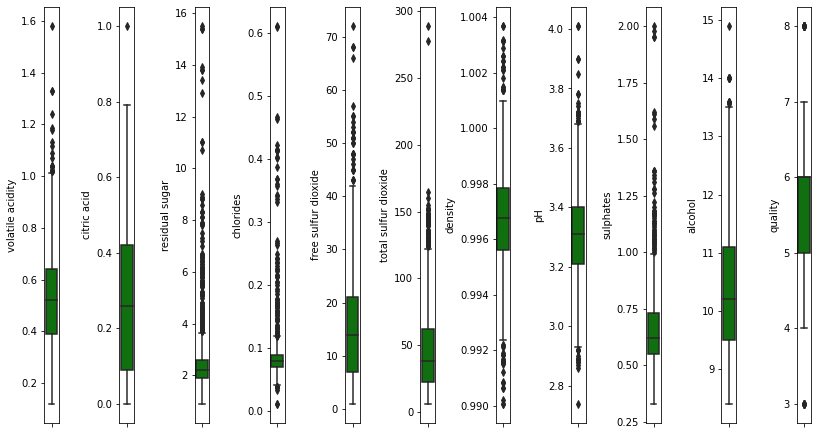

In [29]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
        plt.subplot(nrows,ncol,i+1)
        sns.boxplot(df[collist[i]],color='green',orient='v')
        plt.tight_layout()

Outliers can be seen in the dataset.

In [30]:
from scipy.stats import zscore
zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [31]:
print('shape before removing the outliers:' , df.shape)
df_new=df[(zscr<3).all(axis=1)]
print('shape after removing outliers :', df_new.shape)

shape before removing the outliers: (1599, 12)
shape after removing outliers : (1451, 12)


In [32]:
print('data loss =',100-((1451/1599)*100))

data loss = 9.25578486554096


As the data loss is more than 9%, therefore removing the outliers is not a good idea.

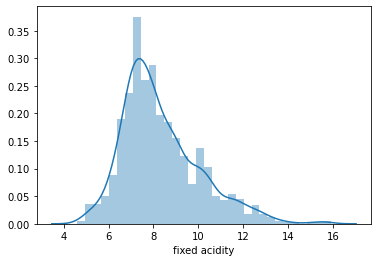

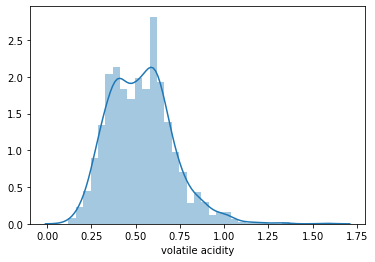

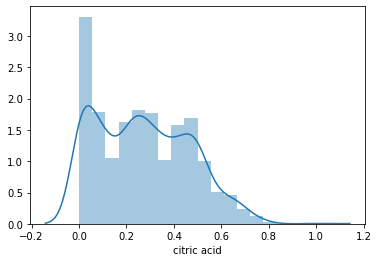

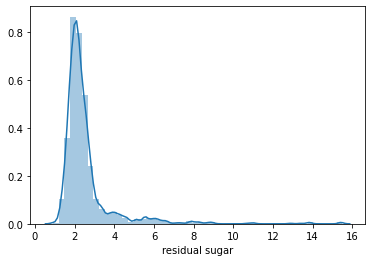

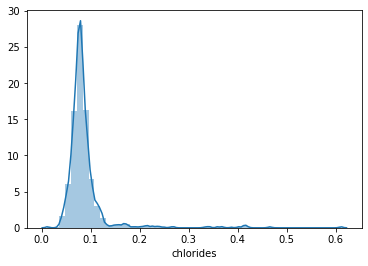

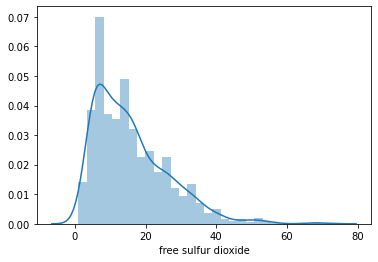

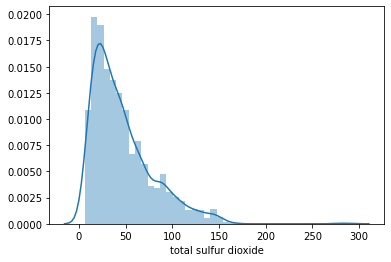

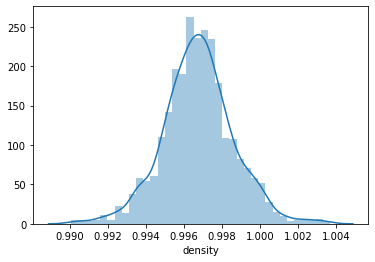

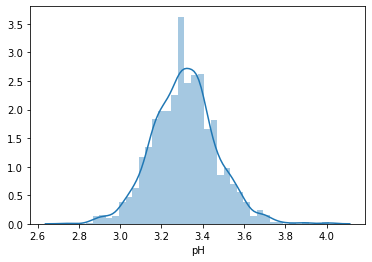

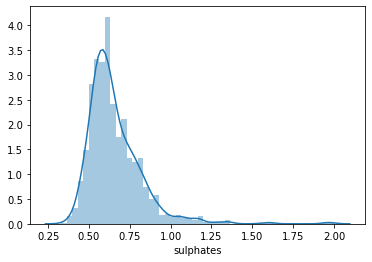

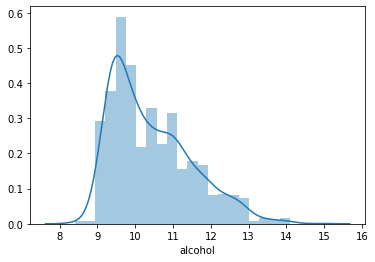

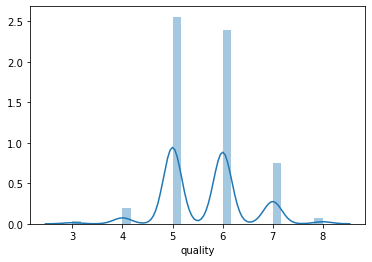

In [37]:
#Checking distribution of skewness
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

Density and ph have normal distribution.
All other columns are right skewed.

In [38]:
#converting the target variable as categorical (good(1) and not good(0)).
df['quality'] = [1 if x >= 7 else 0 for x in df['quality']]

In [39]:
df.quality.unique()

array([0, 1], dtype=int64)

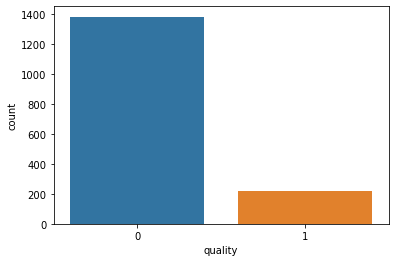

In [41]:
sns.countplot(df['quality'])

In [42]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

Wine marked as good are 217 and not good are 1382.

Seperating the x and y data

In [43]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [44]:
x.shape,y.shape

((1599, 11), (1599,))

In [45]:
#checking skewness
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

Threshold for skewness is +/- 0.5


In [46]:
#Remving skewness
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [47]:
df_new.shape

(1599, 11)

In [48]:
x=df_new

In [49]:
x.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

In [50]:
#All the columns are now under the threshold limit.

Finding the best random state

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is',maxacc,'on random state', maxrs)

Best accuracy is 0.9104166666666667 on random state 9


In [52]:
#We will split out train ans test data with random_state 9
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=9)

In [53]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [55]:
gnb=GaussianNB()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [56]:
model=[lr,gnb,rf,ada,knn,dtc,svc]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('\n')
    print('accuracy score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m, x, y, cv=5)
    print('Cross Validation Score:',score.mean())
    print('auc score:',roc_auc_score(y_test,pred))



accuracy score: LogisticRegression()
0.9104166666666667
[[417   5]
 [ 38  20]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       422
           1       0.80      0.34      0.48        58

    accuracy                           0.91       480
   macro avg       0.86      0.67      0.72       480
weighted avg       0.90      0.91      0.89       480

Cross Validation Score: 0.8699294670846396
auc score: 0.6664896224873346


accuracy score: GaussianNB()
0.8791666666666667
[[377  45]
 [ 13  45]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       422
           1       0.50      0.78      0.61        58

    accuracy                           0.88       480
   macro avg       0.73      0.83      0.77       480
weighted avg       0.91      0.88      0.89       480

Cross Validation Score: 0.8355466300940438
auc score: 0.834613498937735


accuracy score: RandomForestClassifier()
0.91

GaussianNB is the best model with accuracy 88%, cross validation score with 83% and auc score of 83%.

Plotting auc_roc curve for GaussianNB

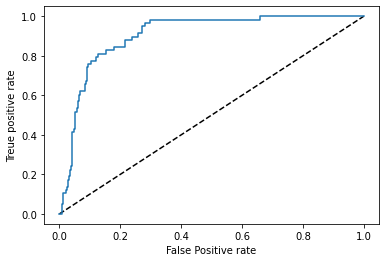

0.834613498937735

In [58]:
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False Positive rate')
plt.ylabel('Treue positive rate')
plt.show()
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
auc_score

In [59]:
#A large area is coverd under the curve which means that our model is performing well.

# Hyper parameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters={'var_smoothing': np.logspace(0,-9, num=100)}
gcv=GridSearchCV(gnb,parameters,cv=5)

In [64]:
#checking the best parameters
gcv.fit(x_train,y_train)
gcv.best_params_

{'var_smoothing': 0.8111308307896871}

In [66]:
predgcv=gcv.best_estimator_.predict(x_test)

In [68]:
print('Accuracy score :', accuracy_score(y_test,predgcv))
score=cross_val_score(gcv.best_estimator_, x, y, cv=5)
print('Cross Validation Score:',score.mean())

Accuracy score : 0.8875
Cross Validation Score: 0.8630368338557993


In [69]:
#Lets save our model
import joblib
joblib.dump(gcv.best_estimator_,'wine_quality_prediction_gnb.obj')

['wine_quality_prediction_gnb.obj']